# Active Brownian Particles


In [1]:
# Install dependencies
!pip3.9 install matplotlib numpy pybind11

# Compile the module abp
!make


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
g++ -O3 -Wall -shared -std=c++11 -undefined dynamic_lookup  $(python3.9 -m pybind11 --includes) functions.cpp pybind.cpp -o abp$(python3.9-config --extension-suffix)


In [2]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
import math
from abp import ABP_2d, point, region


In [10]:
# Define trail parameters
dt = 0.00001
Dr = 1.0
k = 1.0
L = 1.0
mu = 1.0
w = 0.0

# Numbers
pe = 10.0
l_star = 100000.0

# Other parameters
v_max = 8*math.pi*k*mu/L
v = pe*v_max
Dtheta = pe*v_max*v_max/(Dr*l_star)

# Define reactant and target region
reactant = region(0,0,L/40.0)
target = region(L/16,L/16,L/40.0)
    
# Define the active brownian particle
num_steps = 10**7
particle = ABP_2d(reactant, target, num_steps, dt, v, Dr, Dtheta, k, L, mu, w)
particle.dynamics()




ValueError: Received overlapping regions

In [7]:
# Convert data in numpy array (exclude last positions and angles)
x_dyn= np.array(particle.position_x)
y_dyn = np.array(particle.position_y)
theta = np.array(particle.theta)[:-1]
bool_reactant = np.array(particle.bool_reactant)
bool_target = np.array(particle.bool_target)
reactive_path = np.array(particle.reactive_path)

# Apply mask to select only reactive paths
x_dyn = x_dyn[reactive_path]
y_dyn = y_dyn[reactive_path]


## Potential plot

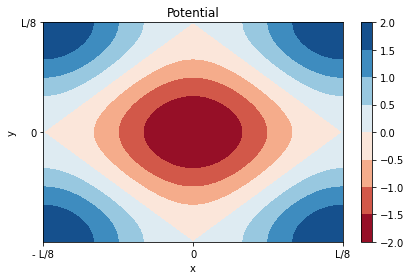

In [8]:
### Contour plot of potential
# Define potential function
def potential(x, y):
    return k*(np.sin(8*math.pi*(x +3./16.*L)/L) + np.sin(8*math.pi*(y+3./16.*L)/L))

# Mesh grid
x = np.linspace(-L/8, L/8, 1000)
y = np.linspace(-L/8, L/8, 1000)
xx, yy = np.meshgrid(x, y)

# Potential
zz = potential(xx,yy)

# Plot
cf = plt.contourf(xx,yy, zz, cmap ="RdBu")
plt.colorbar()

# Rendering
plt.title("Potential")
plt.xlabel("x")
plt.ylabel("y")
x_ticks = [-L/8, 0, L/8 ]
x_labels = ["- L/8","0", "L/8" ]
y_ticks = [0, L/8]
y_labels = ["0", "L/8"]
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
#plt.legend()
plt.tight_layout()
plt.savefig("potential.png")

## Transition probability density

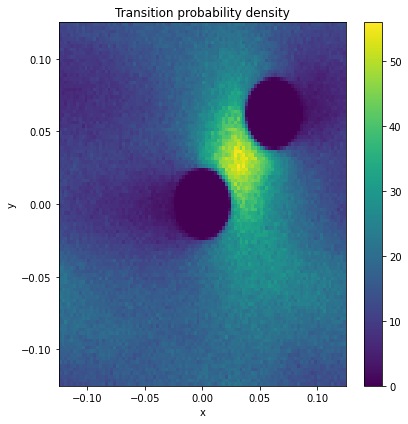

In [9]:
### Plotting
# Contourf and dynamics
plt.figure(figsize=(6,6))
h = plt.hist2d(x_dyn, y_dyn, bins = 100 ,density = True)
plt.colorbar()
#plt.plot(x_start, y_start, c = "blue", marker = "o", ms = 10, ls  = "",label = "Start" )
#plt.plot(x_end, y_end, c = "red", marker = "o", ms = 10, ls  = "",label = "End" )

# Rendering
plt.title("Transition probability density")
plt.xlabel("x")
plt.ylabel("y")
#x_ticks = [-L/8, 0, L/8 ]
#x_labels = ["- L/8","0", "L/8" ]
#y_ticks = [0, L/8]
#y_labels = ["0", "L/8"]
#plt.xticks(x_ticks, x_labels)
#plt.yticks(y_ticks, y_labels)
#plt.legend()
plt.tight_layout()
plt.savefig("prob_density.png")


## Transition times

In [ ]:
# Masks
reactant_dyn = bool_dynamics[:,0]
target_dyn = bool_dynamics[:,1]

is_inside_reactant = reactant_dyn == 1
is_inside_target = target_dyn ==1

print(is_inside_reactant)

In [ ]:
# Times outside reactant
out_reactant = np.where(reactant_dyn==1)[0]
out_reactant = np.array([out_reactant[i]-out_reactant[i-1]-1 for i in range(1,len(out_reactant)) ])
out_reactant = out_reactant[out_reactant!=0]


# Times inside reactant
in_reactant = np.where(reactant_dyn==0)[0]
in_reactant = np.array([in_reactant[i]-in_reactant[i-1]-1 for i in range(1,len(in_reactant)) ])
in_reactant = in_reactant[in_reactant!=0]
in_reactant = in_reactant*dt


plt.hist(in_reactant, bins=100)


In [ ]:
# Count consecutive 1s in list a 

def cc_ones(a):
    seq = a.copy()
    np.append(seq,[0])
    ones = []
    print(SEQ)
    num = a[0]
    for next in seq[1:]:
        count = 0
        if num==1 and next==1:
            count += 1
        elif num==1 and next==0:
            count +=1
            ones.append(count)
            count = 0
        num = next
            

